### **Understand the Impact of Learning Rate on Neural Network Performance**


Deep learning neural networks are trained using the stochastic gradient descent optimization algorithm.

The learning rate is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated. Choosing the learning rate is challenging as a value too small may result in a long training process that could get stuck, whereas a value too large may result in learning a sub-optimal set of weights too fast or an unstable training process.

The learning rate may be the most important hyperparameter when configuring your neural network. 



*  How large learning rates result in unstable training and tiny rates result in a failure to train.

*  Momentum can accelerate training and learning rate schedules can help to converge the optimization process.
*   Adaptive learning rates can accelerate training and alleviate some of the pressure of choosing a learning rate and learning rate schedule.







## **Learning Rate and Gradient Descent**

Deep learning neural networks are trained using the stochastic gradient descent algorithm.

Stochastic gradient descent is an optimization algorithm that estimates the error gradient for the current state of the model using examples from the training dataset, then updates the weights of the model using the back-propagation of errors algorithm, referred to as simply backpropagation.

The amount that the weights are updated during training is referred to as the step size or the “learning rate.”

Specifically, the learning rate is a configurable hyperparameter used in the training of neural networks that has a small positive value, often in the range between 0.0 and 1.0.

The learning rate controls how quickly the model is adapted to the problem. Smaller learning rates require more training epochs given the smaller changes made to the weights each update, whereas larger learning rates result in rapid changes and require fewer training epochs.

A learning rate that is too large can cause the model to converge too quickly to a suboptimal solution, whereas a learning rate that is too small can cause the process to get stuck.

The challenge of training deep learning neural networks involves carefully selecting the learning rate. It may be the most important hyperparameter for the model.

# **Configure the Learning Rate in Keras**
Stochastic Gradient Descent

Keras provides the SGD class that implements the stochastic gradient descent optimizer with a learning rate and momentum.

First, an instance of the class must be created and configured, then specified to the “optimizer” argument when calling the fit() function on the model.

The default learning rate is 0.01 and no momentum is used by default.

from keras.optimizers import SGD
...

opt = SGD()

model.compile(..., optimizer=opt)

The learning rate can be specified via the “lr” argument and the momentum can be specified via the “momentum” argument.


from keras.optimizers import SGD

...
opt = SGD(lr=0.01, momentum=0.9)

model.compile(..., optimizer=opt)

The class also supports learning rate decay via the “decay” argument.

With learning rate decay, the learning rate is calculated each update (e.g. end of each mini-batch) as follows:

from keras.optimizers import SGD

...
opt = SGD(lr=0.01, momentum=0.9, decay=0.01)

model.compile(..., optimizer=opt)


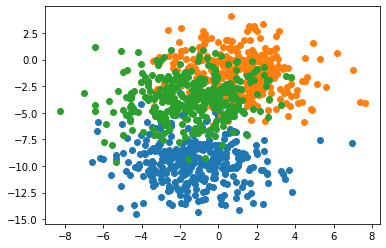

In [ ]:
# scatter plot of blobs dataset
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from numpy import where
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# scatter plot for each class value
for class_value in range(3):
	# select indices of points with the class label
	row_ix = where(y == class_value)
	# scatter plot for points with a different color
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show plot
pyplot.show()

Learning Rate Schedule

Keras supports learning rate schedules via callbacks.

The callbacks operate separately from the optimization algorithm, although they adjust the learning rate used by the optimization algorithm. It is recommended to use the SGD when using a learning rate schedule callback.

Callbacks are instantiated and configured, then specified in a list to the “callbacks” argument of the fit() function when training the model.

Keras provides the ReduceLROnPlateau that will adjust the learning rate when a plateau in model performance is detected, e.g. no change for a given number of training epochs. This callback is designed to reduce the learning rate after the model stops improving with the hope of fine-tuning model weights.

The ReduceLROnPlateau requires you to specify the metric to monitor during training via the “monitor” argument, the value that the learning rate will be multiplied by via the “factor” argument and the “patience” argument that specifies the number of training epochs to wait before triggering the change in learning rate.

For example, we can monitor the validation loss and reduce the learning rate by an order of magnitude if validation loss does not improve for 100 epochs:

## **Effect of Learning Rate and Momentum**

In this section, we will develop a Multilayer Perceptron (MLP) model to address the blobs classification problem and investigate the effect of different learning rates and momentum.
Learning Rate Dynamics

The first step is to develop a function that will create the samples from the problem and split them into train and test datasets.

Additionally, we must also one hot encode the target variable so that we can develop a model that predicts the probability of an example belonging to each class.

The prepare_data() function below implements this behavior, returning train and test sets split into input and output elements.

# Adaptive Learning Rate Gradient Descent
###RMSProp Optimizer

from keras.optimizers import RMSprop
...

opt = RMSprop()

model.compile(..., optimizer=opt)

###Adagrad Optimizer

from keras.optimizers import Adagrad
...
opt = Adagrad()

model.compile(..., optimizer=opt)

###Adam Optimizer

from keras.optimizers import Adam
...
opt = Adam()

model.compile(..., optimizer=opt)


Next, we can develop a function to fit and evaluate an MLP model.

First, we will define a simple MLP model that expects two input variables from the blobs problem, has a single hidden layer with 50 nodes, and an output layer with three nodes to predict the probability for each of the three classes. Nodes in the hidden layer will use the rectified linear activation function (ReLU), whereas nodes in the output layer will use the softmax activation function.

In [ ]:
!pip install optimizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# study of learning rate on accuracy for blobs problem
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


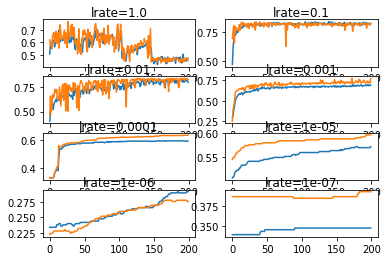

In [ ]:

 
# prepare train and test dataset
def prepare_data():
	# generate 2d classification dataset
	X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
	# one hot encode output variable
	y = to_categorical(y)
	# split into train and test
	n_train = 500
	trainX, testX = X[:n_train, :], X[n_train:, :]
	trainy, testy = y[:n_train], y[n_train:]
	return trainX, trainy, testX, testy
 
# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, lrate):
	# define model
	model = Sequential()
	model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(3, activation='softmax'))
	# compile model
	opt = SGD(lr=lrate)
	model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
	# fit model
	history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
	# plot learning curves
	pyplot.plot(history.history['accuracy'], label='train')
	pyplot.plot(history.history['val_accuracy'], label='test')
	pyplot.title('lrate='+str(lrate), pad=-50)
 
# prepare dataset
trainX, trainy, testX, testy = prepare_data()
# create learning curves for different learning rates
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]
for i in range(len(learning_rates)):
	# determine the plot number
	plot_no = 420 + (i+1)
	pyplot.subplot(plot_no)
	# fit model and plot learning curves for a learning rate
	fit_model(trainX, trainy, testX, testy, learning_rates[i])
# show learning curves
pyplot.show()

The plots show oscillations in behavior for the too-large learning rate of 1.0 and the inability of the model to learn anything with the too-small learning rates of 1E-6 and 1E-7.

We can see that the model was able to learn the problem well with the learning rates 1E-1, 1E-2 and 1E-3, although successively slower as the learning rate was decreased. With the chosen model configuration, the results suggest a moderate learning rate of 0.1 results in good model performance on the train and test sets.

##**Momentum Dynamics**

Momentum can smooth the progression of the learning algorithm that, in turn, can accelerate the training process.

We can adapt the example from the previous section to evaluate the effect of momentum with a fixed learning rate. In this case, we will choose the learning rate of 0.01 that in the previous section converged to a reasonable solution, but required more epochs than the learning rate of 0.1

The fit_model() function can be updated to take a “momentum” argument instead of a learning rate argument, that can be used in the configuration of the SGD class and reported on the resulting plot

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


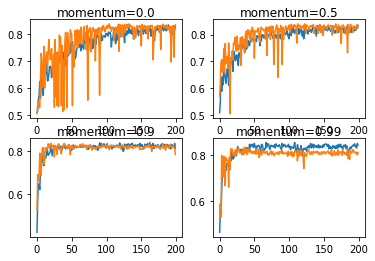

In [ ]:
# prepare train and test dataset
def prepare_data():
	# generate 2d classification dataset
	X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
	# one hot encode output variable
	y = to_categorical(y)
	# split into train and test
	n_train = 500
	trainX, testX = X[:n_train, :], X[n_train:, :]
	trainy, testy = y[:n_train], y[n_train:]
	return trainX, trainy, testX, testy
 
# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, momentum):
	# define model
	model = Sequential()
	model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(3, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, momentum=momentum)
	model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
	# fit model
	history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
	# plot learning curves
	pyplot.plot(history.history['accuracy'], label='train')
	pyplot.plot(history.history['val_accuracy'], label='test')
	pyplot.title('momentum='+str(momentum), pad=-80)
 
# prepare dataset
trainX, trainy, testX, testy = prepare_data()
# create learning curves for different momentums
momentums = [0.0, 0.5, 0.9, 0.99]
for i in range(len(momentums)):
	# determine the plot number
	plot_no = 220 + (i+1)
	pyplot.subplot(plot_no)
	# fit model and plot learning curves for a momentum
	fit_model(trainX, trainy, testX, testy, momentums[i])
# show learning curves
pyplot.show()

We can see that the addition of momentum does accelerate the training of the model. Specifically, momentum values of 0.9 and 0.99 achieve reasonable train and test accuracy within about 50 training epochs as opposed to 200 training epochs when momentum is not used.

In all cases where momentum is used, the accuracy of the model on the holdout test dataset appears to be more stable, showing less volatility over the training epochs.

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


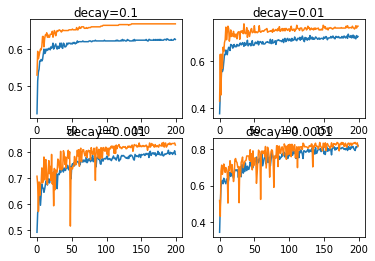

In [ ]:
# study of decay rate on accuracy for blobs problem

 
# prepare train and test dataset
def prepare_data():
	# generate 2d classification dataset
	X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
	# one hot encode output variable
	y = to_categorical(y)
	# split into train and test
	n_train = 500
	trainX, testX = X[:n_train, :], X[n_train:, :]
	trainy, testy = y[:n_train], y[n_train:]
	return trainX, trainy, testX, testy
 
# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, decay):
	# define model
	model = Sequential()
	model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(3, activation='softmax'))
	# compile model
	opt = SGD(lr=0.01, decay=decay)
	model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
	# fit model
	history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
	# plot learning curves
	pyplot.plot(history.history['accuracy'], label='train')
	pyplot.plot(history.history['val_accuracy'], label='test')
	pyplot.title('decay='+str(decay), pad=-80)
 
# prepare dataset
trainX, trainy, testX, testy = prepare_data()
# create learning curves for different decay rates
decay_rates = [1E-1, 1E-2, 1E-3, 1E-4]
for i in range(len(decay_rates)):
	# determine the plot number
	plot_no = 220 + (i+1)
	pyplot.subplot(plot_no)
	# fit model and plot learning curves for a decay rate
	fit_model(trainX, trainy, testX, testy, decay_rates[i])
# show learning curves
pyplot.show()

We can see that the large decay values of 1E-1 and 1E-2 indeed decay the learning rate too rapidly for this model on this problem and result in poor performance. The smaller decay values do result in better performance, with the value of 1E-4 perhaps causing in a similar result as not using decay at all. In fact, we can calculate the final learning rate with a decay of 1E-4 to be about 0.0075, only a little bit smaller than the initial value of 0.01.

#**Effect of Adaptive Learning Rates**

Learning rates and learning rate schedules are both challenging to configure and critical to the performance of a deep learning neural network model.

Keras provides a number of different popular variations of stochastic gradient descent with adaptive learning rates, such as:

    Adaptive Gradient Algorithm (AdaGrad).
    Root Mean Square Propagation (RMSprop).
    Adaptive Moment Estimation (Adam).

Each provides a different methodology for adapting learning rates for each weight in the network.

There is no single best algorithm, and the results of racing optimization algorithms on one problem are unlikely to be transferable to new problems.

We can study the dynamics of different adaptive learning rate methods on the blobs problem. The fit_model() function can be updated to take the name of an optimization algorithm to evaluate, which can be specified to the “optimizer” argument when the MLP model is compiled. The default parameters for each method will then be used. The updated version of the function is listed below.

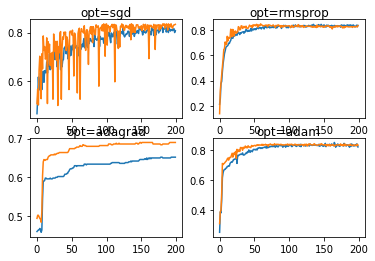

In [ ]:
# study of sgd with adaptive learning rates in the blobs problem

 
# prepare train and test dataset
def prepare_data():
	# generate 2d classification dataset
	X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
	# one hot encode output variable
	y = to_categorical(y)
	# split into train and test
	n_train = 500
	trainX, testX = X[:n_train, :], X[n_train:, :]
	trainy, testy = y[:n_train], y[n_train:]
	return trainX, trainy, testX, testy
 
# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, optimizer):
	# define model
	model = Sequential()
	model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(3, activation='softmax'))
	# compile model
	model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	# fit model
	history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
	# plot learning curves
	pyplot.plot(history.history['accuracy'], label='train')
	pyplot.plot(history.history['val_accuracy'], label='test')
	pyplot.title('opt='+optimizer, pad=-80)
 
# prepare dataset
trainX, trainy, testX, testy = prepare_data()
# create learning curves for different optimizers
momentums = ['sgd', 'rmsprop', 'adagrad', 'adam']
for i in range(len(momentums)):
	# determine the plot number
	plot_no = 220 + (i+1)
	pyplot.subplot(plot_no)
	# fit model and plot learning curves for an optimizer
	fit_model(trainX, trainy, testX, testy, momentums[i])
# show learning curves
pyplot.show()

we can see that SGD with a default learning rate of 0.01 and no momentum does learn the problem, but requires nearly all 200 epochs and results in volatile accuracy on the training data and much more so on the test dataset. The plots show that all three adaptive learning rate methods learning the problem faster and with dramatically less volatility in train and test set accuracy.

Both RMSProp and Adam demonstrate similar performance, effectively learning the problem within 50 training epochs and spending the remaining training time making very minor weight updates, but not converging as we saw with the learning rate schedules in the previous section.

https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/

In [ ]:
https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/


https://www.educba.com/implementation-of-neural-networks/

https://www.analyticsvidhya.com/blog/2022/06/neural-networks-and-deep-learning-with-python/